In [1]:
! rm -rf tools_classifier
! git clone https://github.com/zRafaF/tools_classifier

Cloning into 'tools_classifier'...
remote: Enumerating objects: 343, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 343 (delta 13), reused 146 (delta 6), pack-reused 188 (from 1)
Receiving objects: 100% (343/343), 125.05 MiB | 31.45 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (431/431), done.


# Carregando Metadados

In [21]:
import json

META_DATA_PATH = "./tools_classifier/data_set/metadata.json"


def load_metadata():
    with open(META_DATA_PATH, "r") as file:
        return json.loads(file.read())
    return None

metadata = load_metadata()

print(f'Dimensions: {metadata["height"]} x {metadata["width"]}')
print(f'channels: {metadata["channels"]}')
print(f'extension: {metadata["extension"]}')
print(f'Number of images: {metadata["num_of_images"]}')
print(f'classes: {metadata["classes"]}')

Dimensions: 512 x 512
channels: 4
extension: png
Number of images: 28
classes: {'0': 'calipers', '1': 'clamp', '2': 'cutting_pliers', '3': 'file', '4': 'hammer', '5': 'measuring_tape', '6': 'razor_knife', '7': 'scissors', '8': 'screw_driver', '9': 'wrench'}


In [22]:
import os
import matplotlib.pyplot as plt
from skimage import io

In [23]:
DATA_SET_DIR = './tools_classifier/data_set/c_r_g_png'

In [24]:
images = []

for dir in os.listdir(DATA_SET_DIR):
    images_in_class = []
    data_set_dir = os.path.join(DATA_SET_DIR, dir)

    # Iterando sobre as imagens do diretório
    for filename in os.listdir(data_set_dir):
      if filename.endswith('.png'):
          img_path = os.path.join(data_set_dir, filename)
          image = io.imread(img_path)
          images_in_class.append(image)
    images.append({
        'class': dir,
        'images': images_in_class
    })

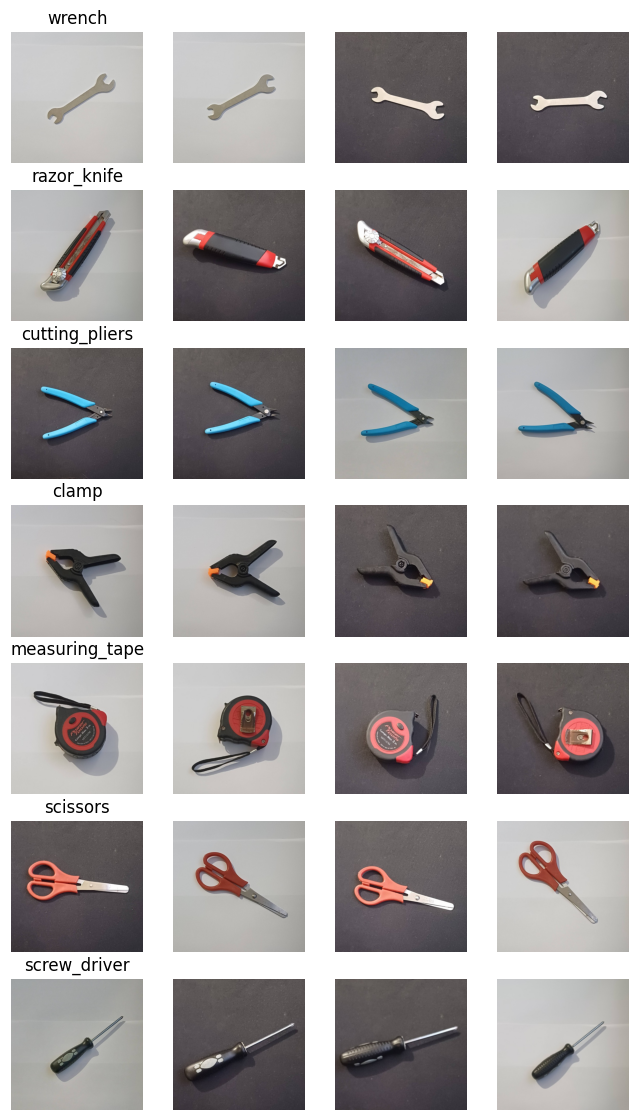

In [25]:
num_of_classes = len(images)
max_images_per_class = max(len(imgs['images']) for imgs in images)

fig, axes = plt.subplots(num_of_classes, max_images_per_class, figsize=(max_images_per_class * 2, num_of_classes * 2))

for i, class_data in enumerate(images):
    class_images = class_data['images']
    class_label = class_data['class']

    for j in range(max_images_per_class):
        if j < len(class_images):
            axes[i, j].imshow(class_images[j])
        axes[i, j].axis('off')

        if j == 0:
            axes[i, j].set_title(class_label)


plt.show()

